# **Price prediction of the diamonds**

### **Participants:**
### **Sultan Kudaybergenov**, 
### **Alua Orynbassarova**, 
### **Zhanmadi Toleugazyuly**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pip install category_encoders


In [ ]:
from category_encoders import OneHotEncoder
import sklearn.tree as st
from sklearn.metrics import mean_squared_error
import sklearn.ensemble as se
from sklearn.metrics import mean_absolute_error

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/diamonds.csv")

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.shape

(53940, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Correlation
A correlation matrix is a square table that shows the correlation coefficients between all pairs of variables in a dataset. Each element of the correlation matrix shows the correlation coefficient between two variables.

The correlation matrix is usually used to study the dependencies between variables and identify the most significant relationships. For example, if the correlation matrix contains high values of correlation coefficients between two variables, this may indicate a strong relationship between them.

<ipython-input-16-ee9ddc9f8a9d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-16-ee9ddc9f8a9d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=.5);


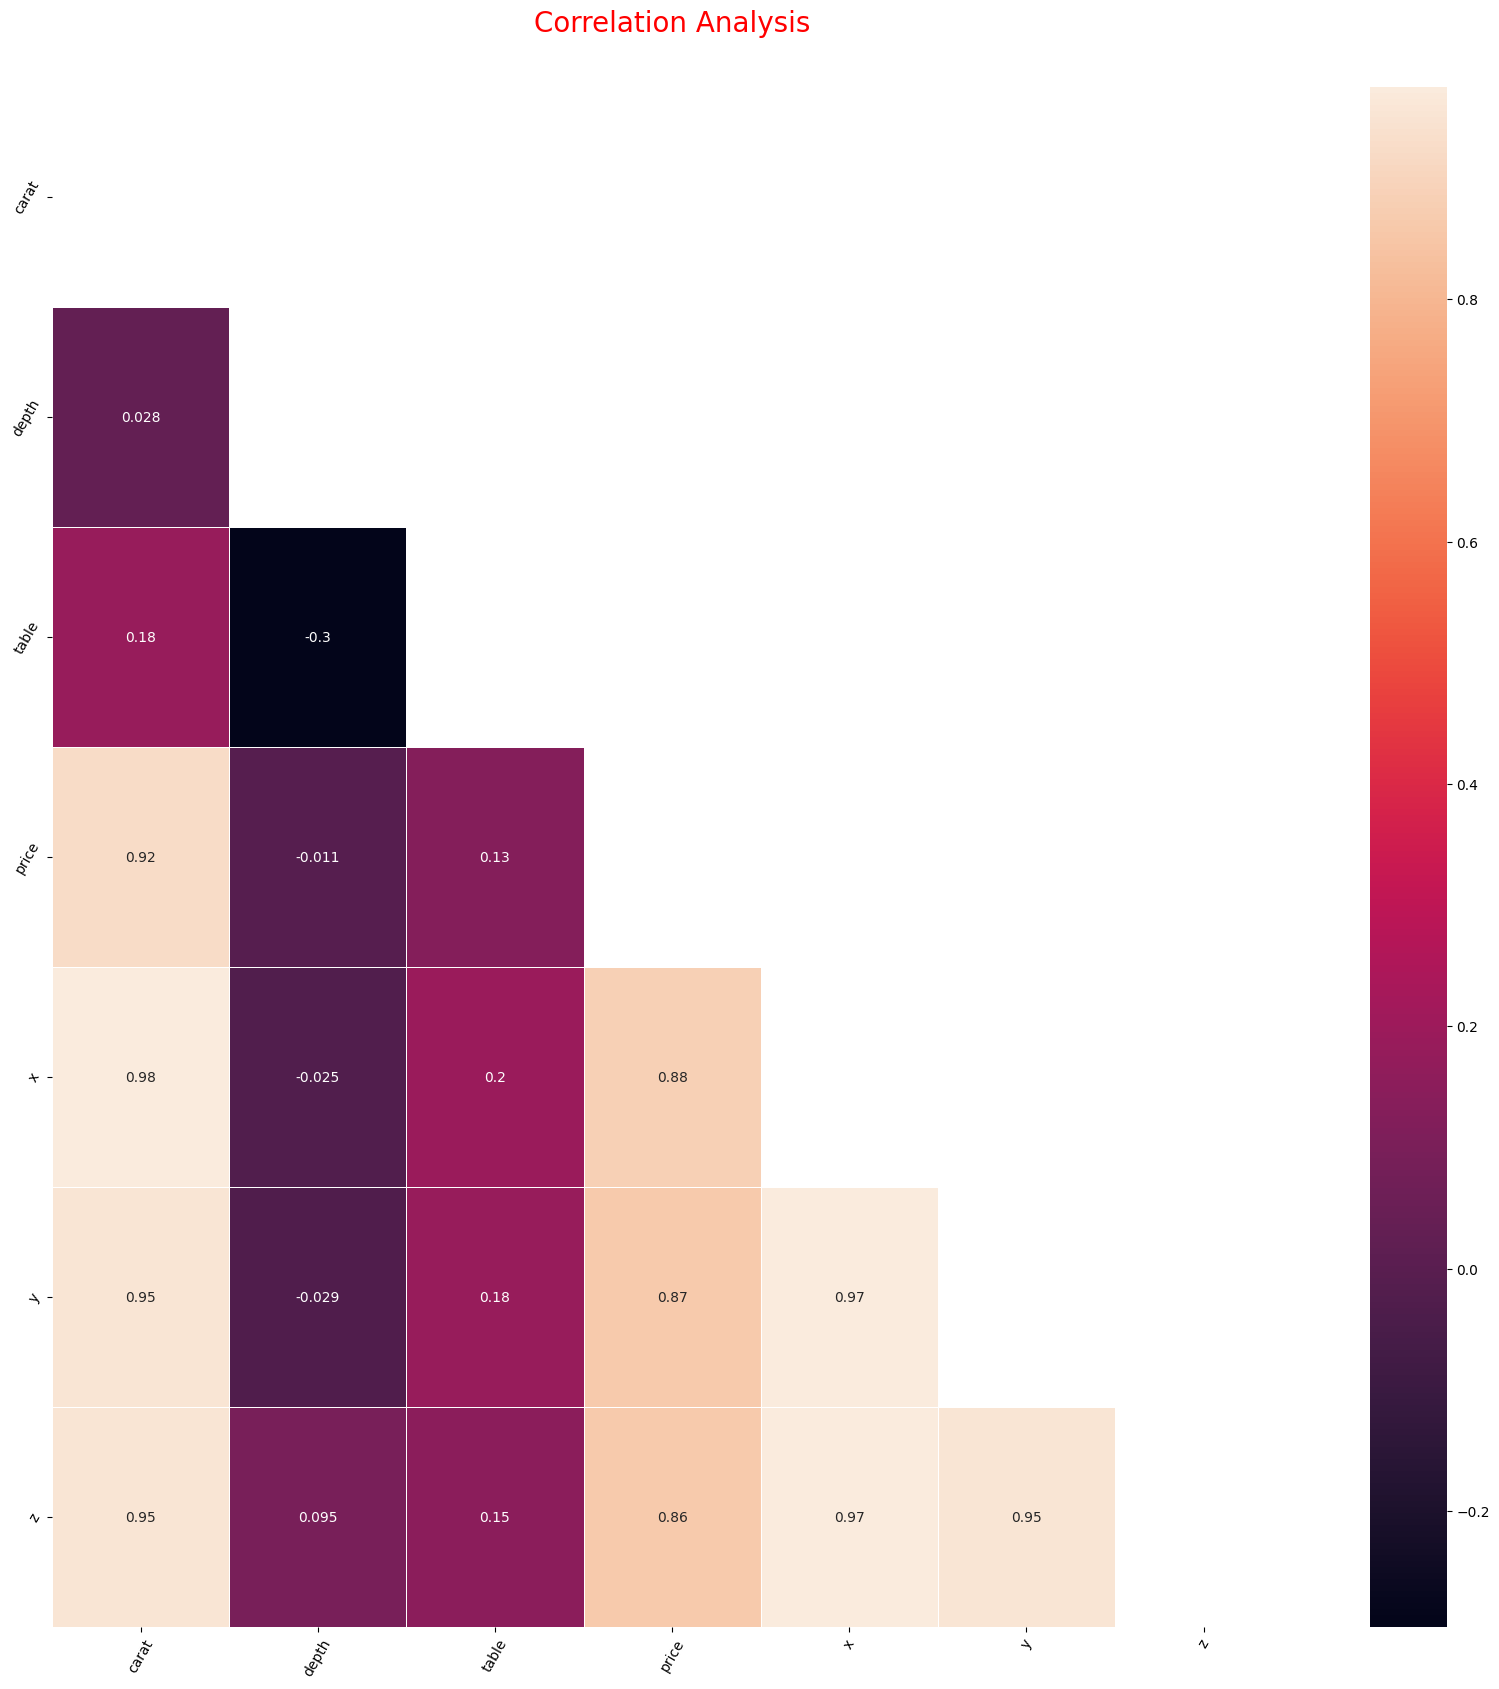

In [ ]:
plt.figure(figsize=(20,20))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

In [ ]:
#Carat and price graph
px.scatter(data_frame=df, x='carat', y='price', color='cut', opacity=0.7)

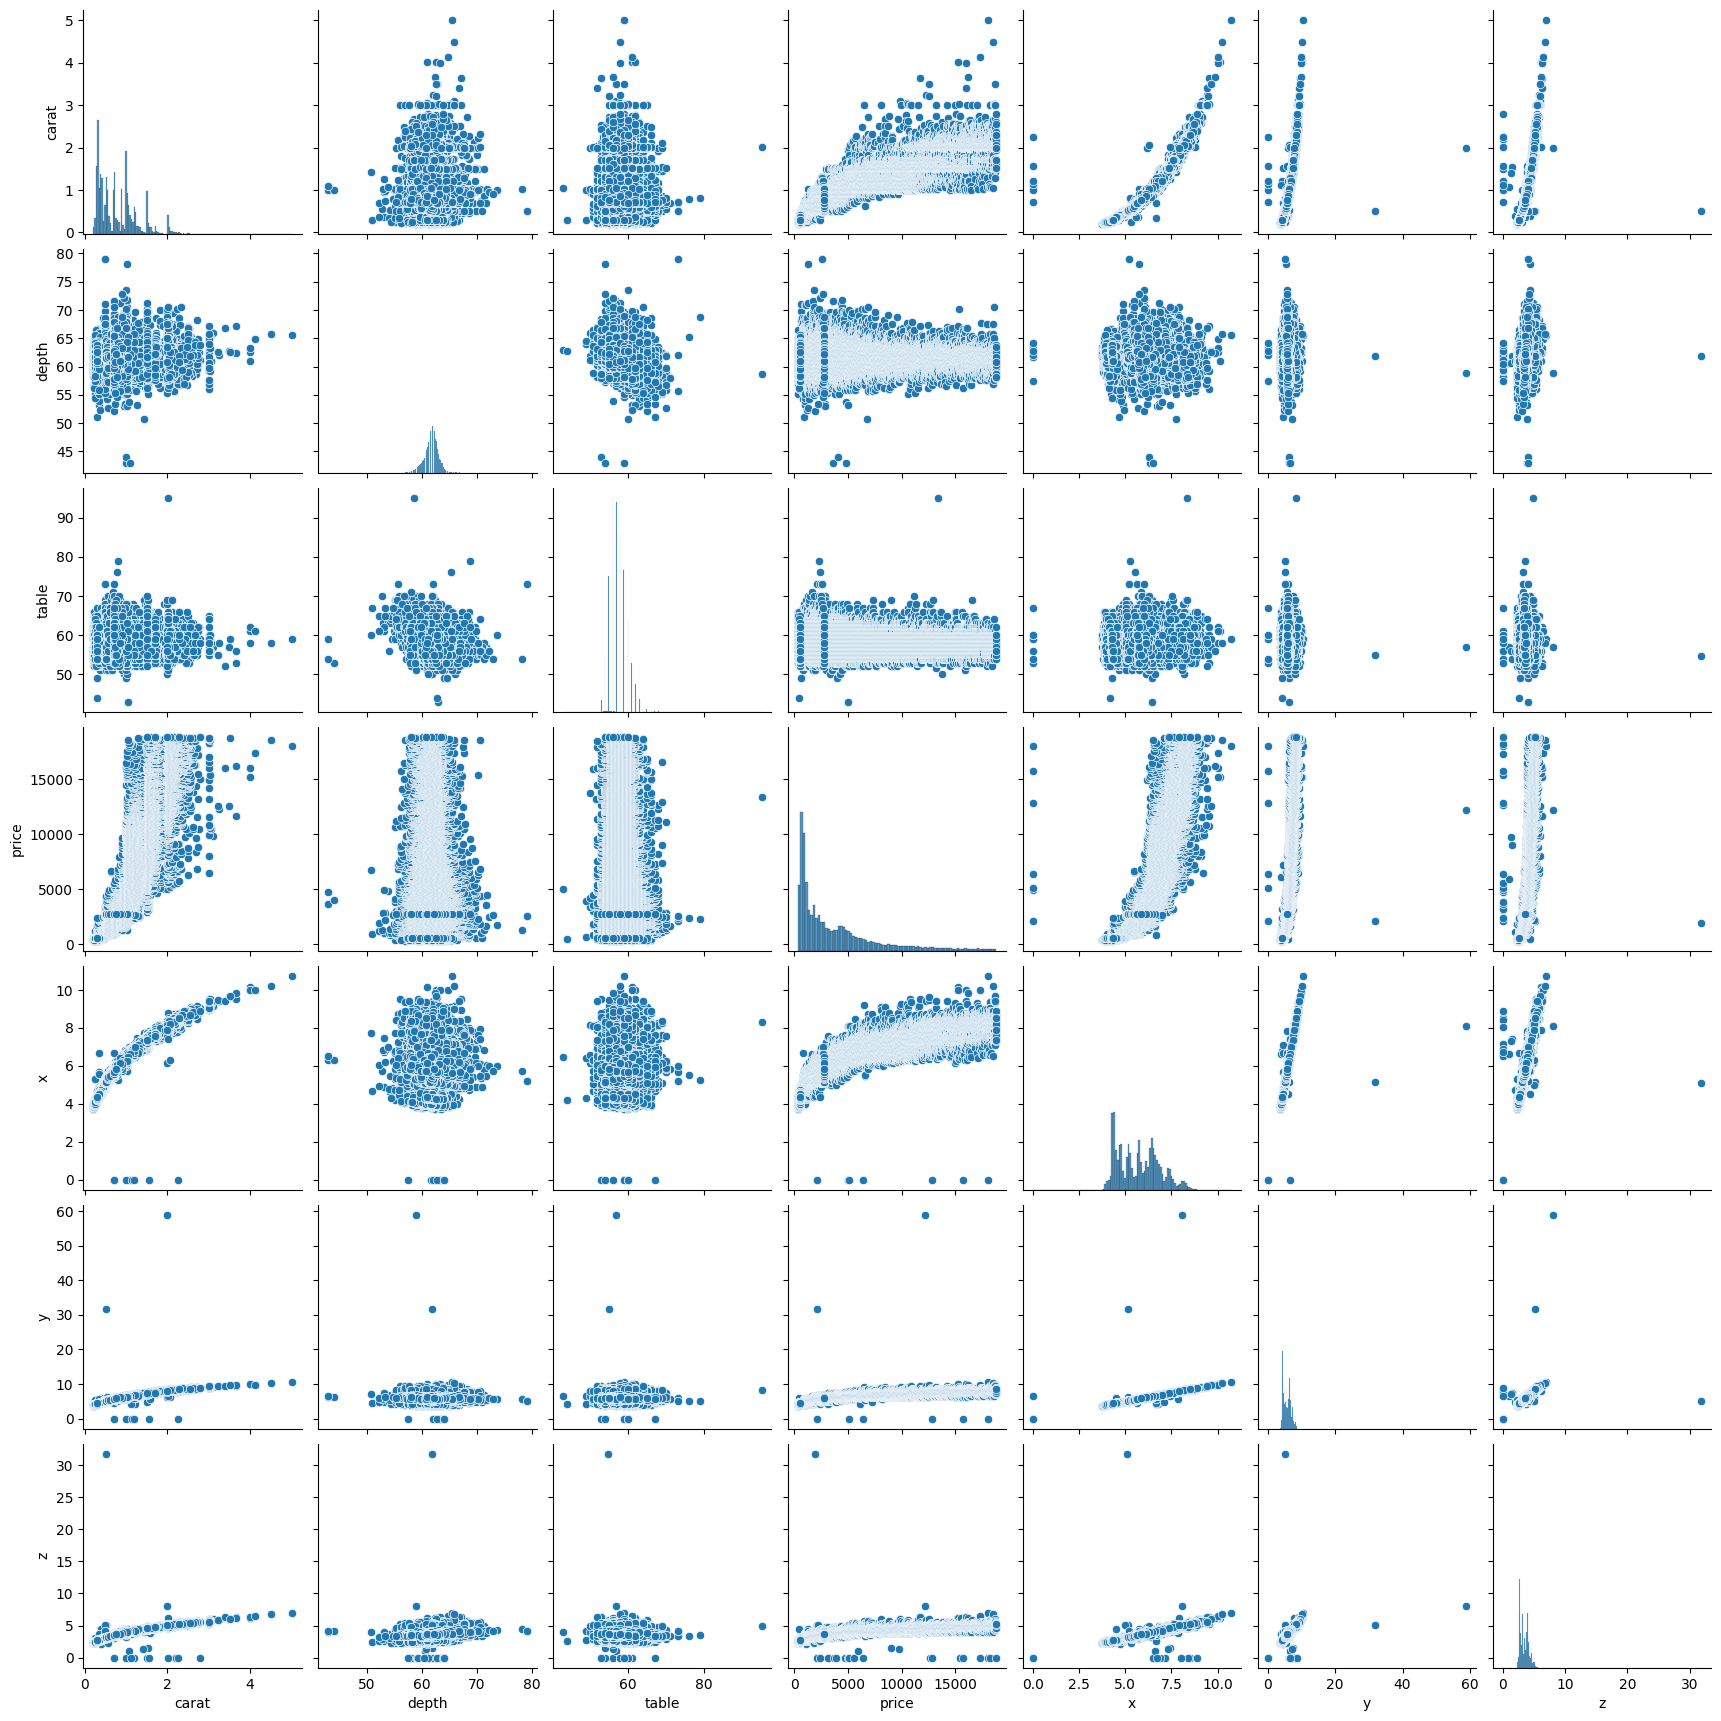

In [ ]:
sns.pairplot(df)

# Cleaning data,feature engineering

In [ ]:
#  Values, that  higher than 10 are outliers

df.drop(df.query('x>10 or y>10 or z>10').index, inplace=True)

In [ ]:
df.drop(df.query('x==0 or y==0 or z==0').index, inplace=True)

In [ ]:
#Creating new parametr - volume
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x', 'y', 'z'], axis=1, inplace=True)


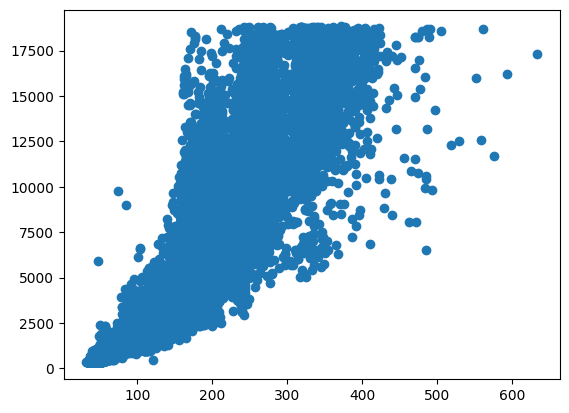

In [ ]:
plt.scatter(df['volume'], df['price'])

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

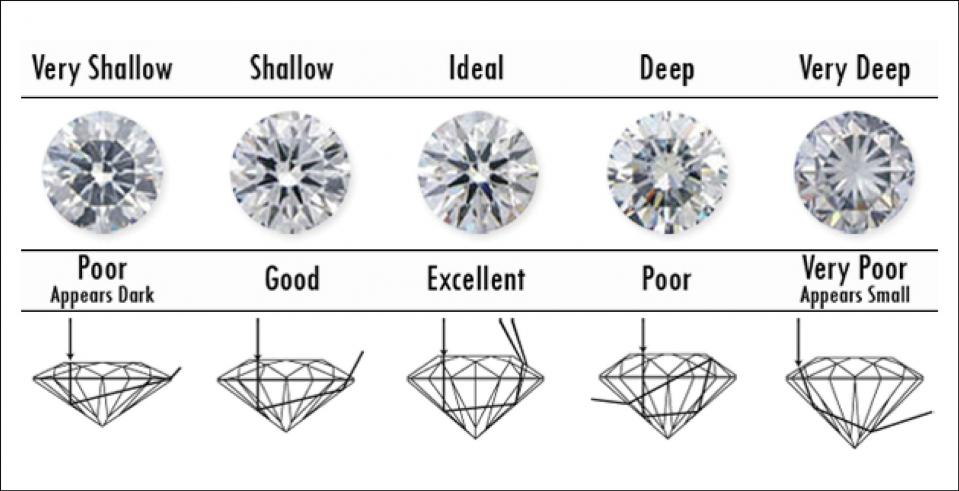

In [ ]:
df['cut'].replace({'Ideal':5, 'Premium':4, 'Good':3, 'Very Good':2, 'Fair':1}, inplace=True)
df['color'].replace({'E': 2, 'I': 6, 'J': 7, 'H': 5, 'F': 3, 'G': 4, 'D': 1}, inplace=True)

In [ ]:
df['clarity'].replace({'I1':1, 'SI2': 2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF': 8}, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,2,2,61.5,55.0,326,38.202030
1,0.21,4,2,3,59.8,61.0,326,34.505856
2,0.23,3,2,5,56.9,65.0,327,38.076885
3,0.29,4,6,4,62.4,58.0,334,46.724580
4,0.31,3,7,2,63.3,58.0,335,51.917250


# Preparing data for the model


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Linear Regression

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.
To find the optimal values of the coefficients b0 and b1, the least squares method (OLS) is used, which minimizes the sum of the squared errors between the model predictions and the real values of the dependent variable. This allows you to find the linear function that best matches the data.



In [ ]:
import sklearn.linear_model as lr

lin_reg_model = lr.LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

# Find prediciotn
y_train_pred = lin_reg_model.predict(X_train)
y_test_pred  = lin_reg_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Train RMSE: ", train_rmse)

test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Test RMSE: ", test_rmse)

Train RMSE:  1228.1010153614354
Test RMSE:  1189.439776360689


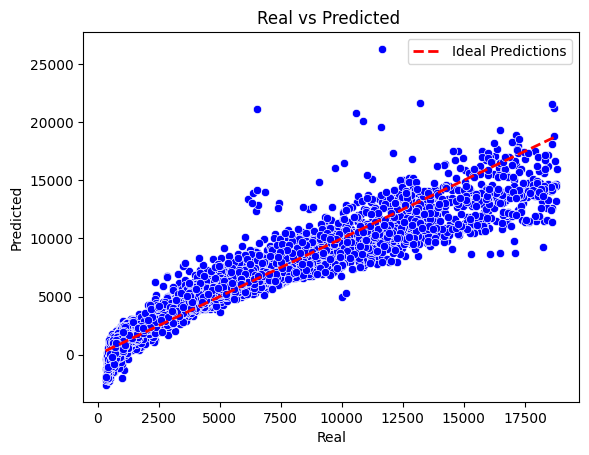

In [ ]:


sns.scatterplot(x=y_test, y=y_test_pred, color="blue")
plt.title('Real vs Predicted ')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Predictions')


plt.legend()

plt.show()


The coefficient of determination (R2) is a statistical measure that is used to assess how well a linear regression model fits the data.

The coefficient of determination takes values from 0 to 1 and shows the proportion of variance of the dependent variable (Y), which is explained by the linear regression model. The higher the R-squared value, the better the model fits the data.

The formula for calculating the R-square:

R-square = 1 - (SSres / SStot)

In [ ]:
print("Results for training data: {:.2%}".format(lin_reg_model.score(X_train, y_train)))
print("Results fot testing: {:.2%}".format(lin_reg_model.score(X_test, y_test)))

Results for training data: 90.63%
Results fot testing: 90.60%


# Decision Tree Regressor.

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

In [ ]:
import sklearn.tree as st

tree_reg_model = st.DecisionTreeRegressor()
tree_reg_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred2 = tree_reg_model.predict(X_train)
y_test_pred2  = tree_reg_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred2, squared=False)
print("Train RMSE: ", train_rmse)

test_rmse = mean_squared_error(y_test, y_test_pred2, squared=False)
print("Test RMSE: ", test_rmse)

Train RMSE:  33.94076229671313
Test RMSE:  700.3897703232303


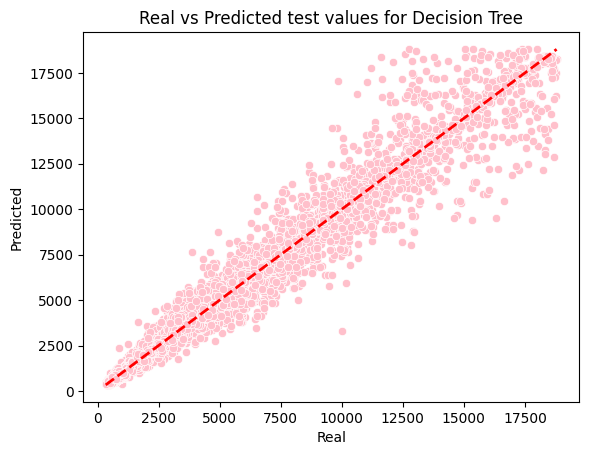

In [ ]:
sns.scatterplot(x=y_test, y=y_test_pred2, color="pink")
plt.title('Real vs Predicted test values for Decision Tree')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Predictions')

plt.show()

In [ ]:
print("Results for training data: {:.2%}".format(tree_reg_model.score(X_train, y_train)))
print("Results fot testing: {:.2%}".format(tree_reg_model.score(X_test, y_test)))

Results for training data: 99.99%
Results fot testing: 96.74%


# Random Forest Regressor.
The random forest algorithm for regression problems is applied as follows:

A random forest consists of a large number of decision trees that are built on random subsets of training data and random subsets of features.

Each decision tree is trained on a random subset of data and features. This avoids overfitting and increases the stability of the model.

When predicting the value of a target variable for a new dataset, each decision tree makes its own prediction.

To obtain a final prediction, the predictions of all decision trees are averaged.

In [ ]:
import sklearn.ensemble as se

forest_reg_model = se.RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = forest_reg_model.predict(X_train)
y_test_pred3  = forest_reg_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Train RMSE: ", train_rmse)

test_rmse = mean_squared_error(y_test, y_test_pred3, squared=False)
print("Test RMSE: ", test_rmse)


Train RMSE:  205.54252381804545
Test RMSE:  521.8847878233919


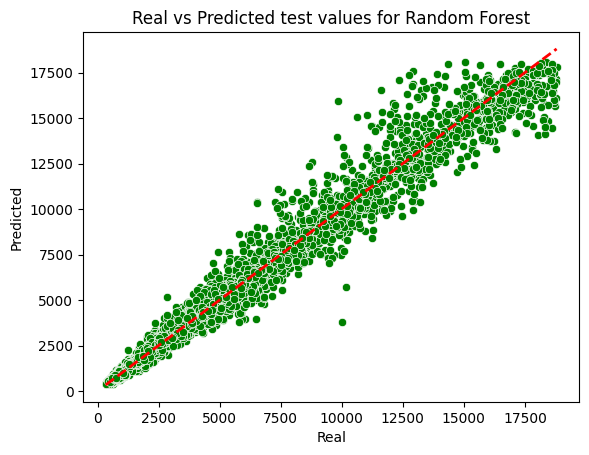

In [ ]:
sns.scatterplot(x=y_test, y=y_test_pred3, color="green")
plt.title('Real vs Predicted test values for Random Forest')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Predictions')

plt.show()


In [ ]:
print("Result for random forest: {:.2%}".format(forest_reg_model.score(X_train, y_train)))
print("Result for random forest: {:.2%}".format(forest_reg_model.score(X_test, y_test)))

Result for random forest: 99.74%
Result for random forest: 98.19%


We will cgoose random forest , as it shows higher results in comparison to other methods

In [ ]:
new_d = [0.23, 5, 2, 1, 61.5, 55, 38.20]

In [ ]:
pred_price = forest_reg_model.predict([new_d])

print("Price: ", pred_price[0])

Price:  397.82


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,2,2,61.5,55.0,326,38.202030
1,0.21,4,2,3,59.8,61.0,326,34.505856
2,0.23,3,2,5,56.9,65.0,327,38.076885
3,0.29,4,6,4,62.4,58.0,334,46.724580
4,0.31,3,7,2,63.3,58.0,335,51.917250


In [ ]:
import pickle

In [ ]:
file1 = open("diamond_model.pkl", 'wb')

pickle.dump(forest_reg_model, file1)
file1.close()

In [ ]:
file2 = open("diamond_model.pkl", 'rb')
model = pickle.load(file2)

In [ ]:
from google.colab import files
files.download('diamond_model.pkl')